In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.utils import resample,shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
bank_df = pd.read_csv(r"C:\Term 3\Supervised learning with python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data\bank.csv")
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


#### This data is related to telemarketing data. This data contains features relevant to telemarketing phone calls to a potential hat whether tha individual would respond to the marketing campaign

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [19]:
print("Percentage of people who subscribed ",round(bank_df[bank_df['subscribed']=='no'].shape[0]/bank_df.shape[0]*100,2))
print("Percentage of people who did not subscribed ",round(bank_df[bank_df['subscribed']=='yes'].shape[0]/bank_df.shape[0]*100,2))


Percentage of people who subscribed  88.48
Percentage of people who did not subscribed  11.52


### our objective is to identify all potential customers who will be subscribing to the telemarketing campaign. if our model predicts wrongly that a person will be subscribing then that will be sunk cost to company so our main aim here is to improve precision of algorithm

### The dataset here is highly imbalanced the model may bias towards the data that is highly represented and may not be able to learn from samples that are not highly represented

In [23]:
#Seprate the subscriber of no and yes class
bank_subscribed_yes = bank_df[bank_df['subscribed']=='yes']
bank_subscribed_no = bank_df[bank_df['subscribed']=='no']
df_minority_upsampled = resample(bank_subscribed_yes,replace=True,n_samples=2000)
new_bank_df = pd.concat([bank_subscribed_no,df_minority_upsampled])
new_bank_df = shuffle(new_bank_df)
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')

In [25]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)
X = encoded_bank_df
Y = new_bank_df.subscribed.map(lambda x:1 if x=='yes' else 0)


In [42]:
train_X, test_X, train_y, test_y =  train_test_split(X,Y, test_size = 0.3, random_state=42,stratify = Y)
logit = LogisticRegression()
logit.fit(train_X, train_y)
pred_y = logit.predict(train_X)

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sn.heatmap(cm,annot = True,fmt = '.2f',xticklabels = ['Not Subscribed','Subscribed'],yticklabels = ['Not Subscribed', 'Subscribed'])
    plt.ylabel("True label")
    plt.xlabel("Predicted")
    plt.show()

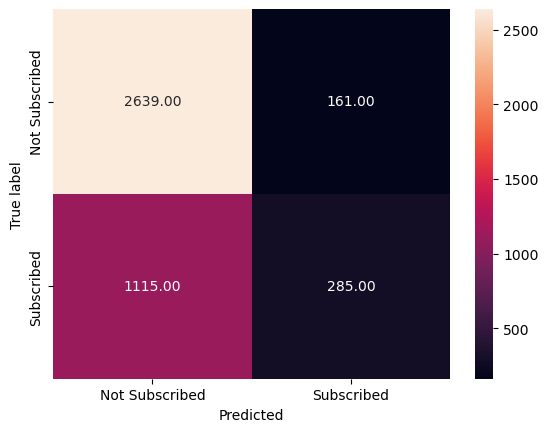

In [58]:
draw_cm(train_y,pred_y)

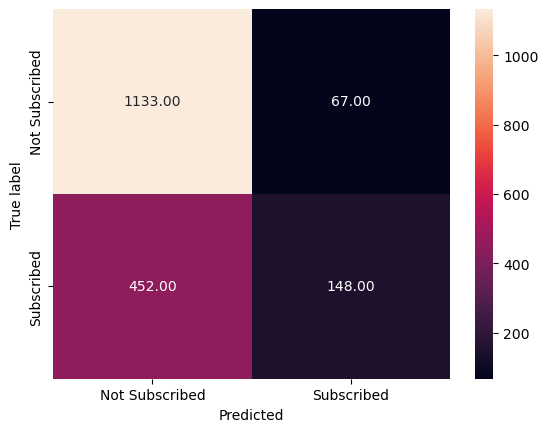

In [59]:
pred_test_y = logit.predict(test_X)
draw_cm(test_y,pred_test_y)

In [55]:
print(metrics.classification_report(test_y,pred_test_y))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1200
           1       0.69      0.25      0.36       600

    accuracy                           0.71      1800
   macro avg       0.70      0.60      0.59      1800
weighted avg       0.71      0.71      0.66      1800



#### from classification report we can see that though precision is good recall is very poor which means our model is missing most of the customer who will actually subscribe to our product which means lost business to bank

In [64]:
predict_proba_df = pd.DataFrame(logit.predict_proba(test_X))
predict_proba_df.head()

,0,1
0,0.720985,0.279015
1,0.777157,0.222843
2,0.648352,0.351648
3,0.763120,0.236880
4,0.280891,0.719109


In [65]:
test_results_df['chd_1']

,1
0,0.279015
1,0.222843
2,0.351648
3,0.236880
4,0.719109
...,...
1795,0.380707
1796,0.179290
1797,0.318090
1798,0.303571


In [66]:
test_results_df = pd.DataFrame({'actual':test_y})
test_results_df = test_results_df.reset_index()
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [69]:
auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
round(float(auc_score),2)

0.71

In [70]:
probs = logit.predict_proba(test_X)

ROC Curve (area = 0.71)


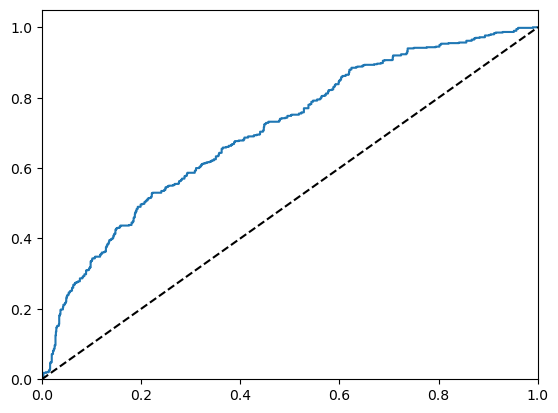

In [79]:
def roc_auc_curve(test_y,probs):
    fpr,tpr, thresholds = metrics.roc_curve(test_y,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(test_y,probs)
    print('ROC Curve (area = %0.2f)' % auc_score)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.show()
    
roc_auc_curve(test_y,probs[:,1:])

ROC Curve (area = 0.83)


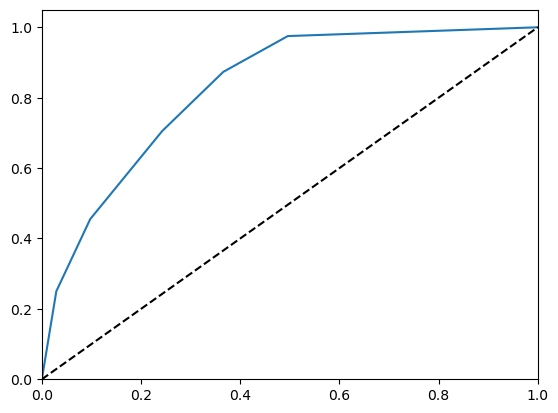

In [90]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X,train_y)
knn_probs_y = knn_clf.predict_proba(test_X)
roc_auc_curve(test_y,knn_probs_y[:,1:])

In [93]:
knn_pred_y = knn_clf.predict(test_X)

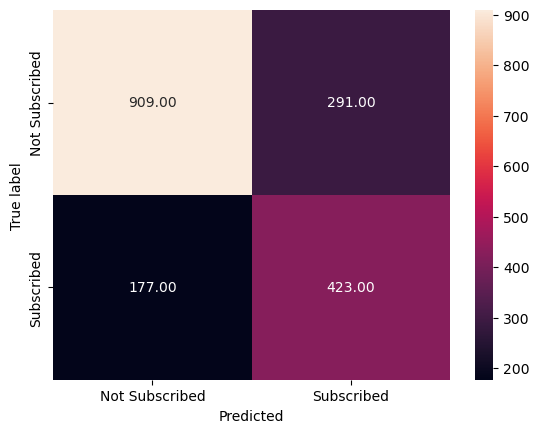

In [94]:
draw_cm(test_y,knn_pred_y)

In [95]:
print(metrics.classification_report(test_y,knn_pred_y))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1200
           1       0.59      0.70      0.64       600

    accuracy                           0.74      1800
   macro avg       0.71      0.73      0.72      1800
weighted avg       0.76      0.74      0.74      1800



#### We can see that KNN gives better result in terms of recall as compared to logistic regression. To select which model to go with we can create payoff matrix 

In [96]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':range(5,10), 'metric':['canberra','euclidean','minkowski']}]
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv = 10, scoring = 'roc_auc')
clf.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [97]:
clf.best_score_

0.819470663265306

In [98]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [100]:
from sklearn.ensemble import RandomForestClassifier
rndm_clf = RandomForestClassifier(max_depth=10, n_estimators = 10)
rndm_clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=10, n_estimators=10)

ROC Curve (area = 0.86)


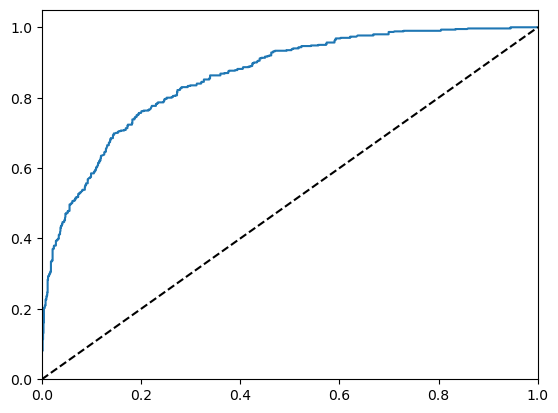

In [103]:
rndm_probs_y = rndm_clf.predict_proba(test_X)
roc_auc_curve(test_y,rndm_probs_y[:,1:])

In [107]:
tuned_parameters = [{"max_depth":[10,15],"n_estimators":[10,20], "max_features":['sqrt',0.2]}]
rndm_clf = RandomForestClassifier()
clf = GridSearchCV(rndm_clf,tuned_parameters,cv=5,scoring = 'roc_auc')
clf.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [108]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

In [109]:
rndm_best_prob_y = clf.predict_proba(test_X)

ROC Curve (area = 0.95)


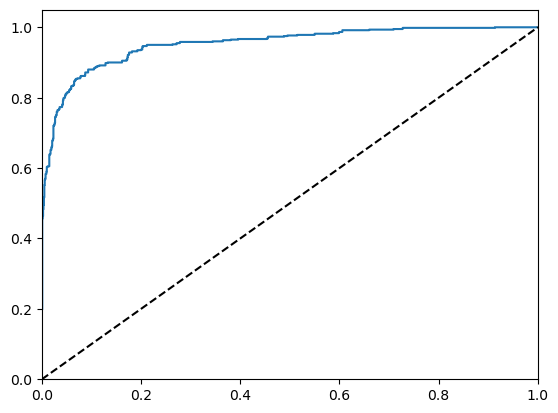

In [111]:
roc_auc_curve(test_y,rndm_best_prob_y[:,1:])

In [112]:
rndm_predict_y = clf.predict(test_X)

In [113]:
print(metrics.classification_report(test_y,rndm_predict_y))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1200
           1       0.90      0.80      0.85       600

    accuracy                           0.90      1800
   macro avg       0.90      0.88      0.89      1800
weighted avg       0.90      0.90      0.90      1800



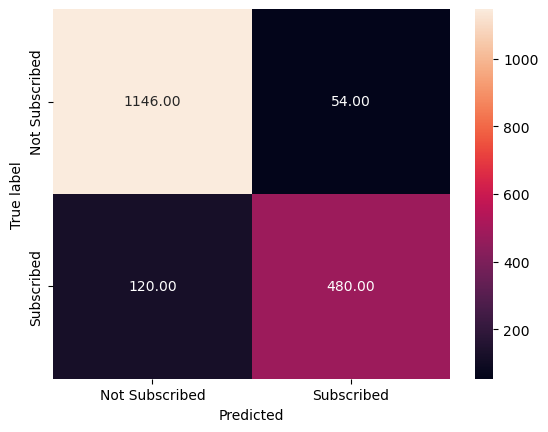

In [114]:
draw_cm(test_y,rndm_predict_y)